# Group Work Project #3
Names: Alfonso, Scholastica, Nwosu Stephen

In [ ]:
pip install fredapi

In [ ]:
from fredapi import Fred
import pandas as pd

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## Money at a floating rate for a secured purchase

Writing Python code that allows the financing team to enact Money at a floating rate for a secured purchase scenario

In [ ]:
# Initializing FRED API
fred = Fred(api_key= 'bdfb2ffb9f9d4b9c8dfda3a5bd6550d0')

# Sourcing inflation rate data from FRED API
inflation_rate_data = fred.get_series('CPIAUCSL')  # Consumer Price Index for All Urban Consumers

# Sourcing interest rate data from Yahoo Finance
mortgage_rate = yf.Ticker('^IRX')  # 13-Week T-Bill as a proxy for floating rate
mortgage_rate_history = mortgage_rate.history(period="5y")['Close']

# Sample dataset for home loans
borrower_data = pd.DataFrame({
    'Borrower': ['A', 'B', 'C', 'D'],
    'Loan_to_Value_Ratio': [0.7, 0.8, 0.75, 0.9],  # LTV ratios for borrowers
    'Credit_Score': [700, 650, 720, 640]  # Credit scores for borrowers
})

# Combining the borrower data with sourced inflation and interest rate data
borrower_data['Inflation_Rate'] = inflation_rate_data[-1]
borrower_data['Interest_Rate'] = mortgage_rate_history[-1]

# Defining thresholds for loan approval based on floating rate and LTV ratio
ltv_threshold = 0.8  # Maximum Loan-to-Value ratio
credit_score_threshold = 680  # Minimum credit score for loan approval

# Loan approval decision based on LTV ratio, credit score, and inflation/interest rate environment
borrower_data['Loan_Approval'] = (
    (borrower_data['Loan_to_Value_Ratio'] <= ltv_threshold) &
    (borrower_data['Credit_Score'] >= credit_score_threshold)
)

# Output the result
print(borrower_data)

  Borrower  Loan_to_Value_Ratio  Credit_Score  Inflation_Rate  Interest_Rate  \
0        A                 0.70           700         314.686          4.498   
1        B                 0.80           650         314.686          4.498   
2        C                 0.75           720         314.686          4.498   
3        D                 0.90           640         314.686          4.498   

   Loan_Approval  
0           True  
1          False  
2           True  
3          False  


<ipython-input-4-bf8b07fec72d>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  borrower_data['Inflation_Rate'] = inflation_rate_data[-1]
<ipython-input-4-bf8b07fec72d>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  borrower_data['Interest_Rate'] = mortgage_rate_history[-1]


solution 2

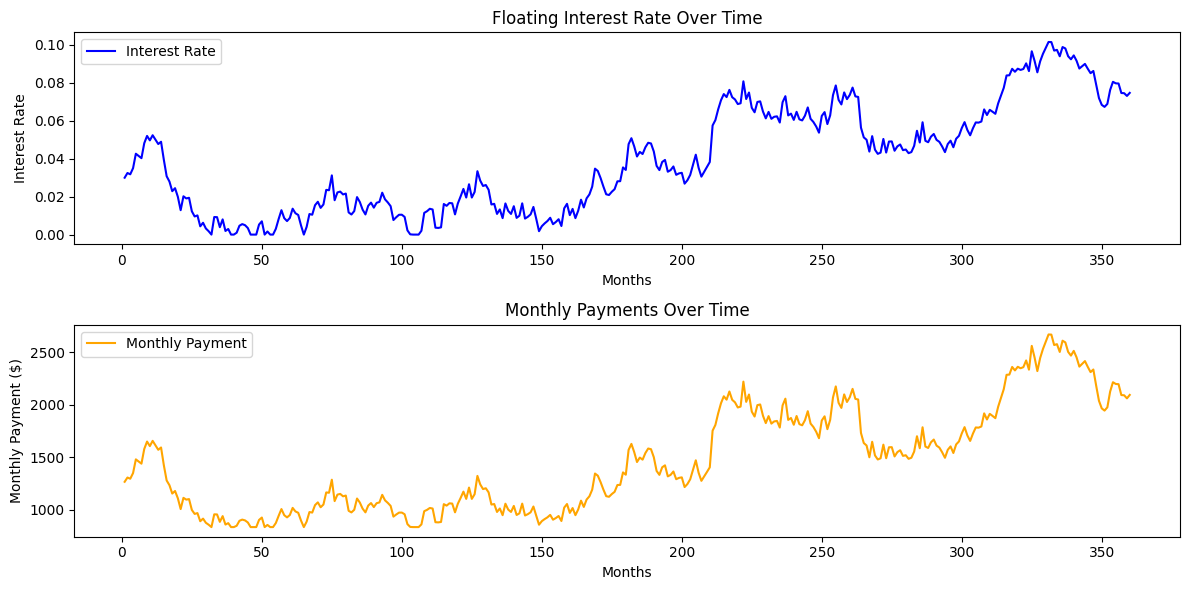

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
loan_amount = 300000  # Principal loan amount
interest_rate_initial = 0.03  # Initial interest rate (3%)
loan_term_years = 30  # Loan term in years
payment_frequency = 12  # Monthly payments

# Function to calculate monthly payment based on floating interest rates
def calculate_monthly_payment(principal, annual_rate, term_years):
    if annual_rate == 0:
        return principal / (term_years * payment_frequency)  # Simple repayment if no interest
    monthly_rate = annual_rate / payment_frequency
    num_payments = term_years * payment_frequency
    return principal * (monthly_rate * (1 + monthly_rate) ** num_payments) / ((1 + monthly_rate) ** num_payments - 1)

# Simulating interest rate changes over time
np.random.seed(42)
interest_rates = [interest_rate_initial]
for _ in range(loan_term_years * payment_frequency - 1):
    change = np.random.normal(0, 0.005)  # Simulating interest rate changes
    new_rate = max(0, interest_rates[-1] + change)
    interest_rates.append(new_rate)

# Calculating payments for each month based on floating rates
monthly_payments = [calculate_monthly_payment(loan_amount, rate, loan_term_years) for rate in interest_rates]

# Creating DataFrame for analysis
df = pd.DataFrame({'Month': range(1, len(monthly_payments) + 1), 'Interest Rate': interest_rates, 'Monthly Payment': monthly_payments})

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['Month'], df['Interest Rate'], label='Interest Rate', color='blue')
plt.title('Floating Interest Rate Over Time')
plt.xlabel('Months')
plt.ylabel('Interest Rate')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['Month'], df['Monthly Payment'], label='Monthly Payment', color='orange')
plt.title('Monthly Payments Over Time')
plt.xlabel('Months')
plt.ylabel('Monthly Payment ($)')
plt.legend()

plt.tight_layout()
plt.show()

## Publicly traded equity

Security lending scenario for financing team.

In [1]:
import pandas as pd
import yfinance as yf

# Sample client data
client_data = {
    'Name': 'Alice Smith',
    'Age': 45,
    'Annual_Income': 150000,  # in USD
    'Credit_Score': 720,      # FICO score
    'Employment_Status': 'Employed',  # Options: 'Employed', 'Self-Employed', 'Unemployed'
}

# Sample collateral data (publicly traded equity)
collateral_data = [
    {'Ticker': 'AAPL', 'Number_of_Shares': 100},
    {'Ticker': 'MSFT', 'Number_of_Shares': 50},
    {'Ticker': 'GOOGL', 'Number_of_Shares': 30},
]

# Function to get current market prices of equities
def get_market_prices(collateral_list):
    prices = {}
    for item in collateral_list:
        ticker = item['Ticker']
        stock = yf.Ticker(ticker)
        # Get the last closing price
        price = stock.history(period='1d')['Close'][-1]
        prices[ticker] = price
    return prices

# Function to calculate collateral value
def calculate_collateral_value(collateral_list, prices):
    total_value = 0
    for item in collateral_list:
        ticker = item['Ticker']
        num_shares = item['Number_of_Shares']
        market_price = prices[ticker]
        value = num_shares * market_price
        item['Market_Price'] = market_price
        item['Total_Value'] = value
        total_value += value
    return total_value

# Function to assess risk and assign risk score
def assess_risk(client):
    risk_score = 0

    # Evaluate Credit Score
    if client['Credit_Score'] >= 750:
        risk_score += 1
    elif client['Credit_Score'] >= 700:
        risk_score += 2
    elif client['Credit_Score'] >= 650:
        risk_score += 3
    else:
        risk_score += 5

    # Evaluate Employment Status
    if client['Employment_Status'] == 'Employed':
        risk_score += 1
    elif client['Employment_Status'] == 'Self-Employed':
        risk_score += 2
    else:
        risk_score += 5

    return risk_score

# Function to determine Loan-to-Value (LTV) ratio based on risk score
def determine_ltv_ratio(risk_score):
    # Base LTV ratio
    base_ltv = 50  # in percent

    # Adjust LTV based on risk score
    if risk_score <= 3:
        ltv = base_ltv + 20  # Low risk clients get higher LTV
    elif risk_score <= 6:
        ltv = base_ltv + 10
    elif risk_score <= 9:
        ltv = base_ltv
    else:
        ltv = base_ltv - 10  # High risk clients get lower LTV

    # Ensure LTV does not exceed regulatory maximum (e.g., 70%)
    MAX_LTV = 70
    if ltv > MAX_LTV:
        ltv = MAX_LTV

    return ltv

# Function to determine interest rate based on risk score
def determine_interest_rate(risk_score):
    # Base interest rate
    base_rate = 3.0  # in percent

    # Risk premium
    if risk_score <= 3:
        risk_premium = 1.0
    elif risk_score <= 6:
        risk_premium = 2.0
    elif risk_score <= 9:
        risk_premium = 3.0
    else:
        risk_premium = 5.0

    # Total interest rate
    interest_rate = base_rate + risk_premium

    return interest_rate

# Function to make lending decision
def make_lending_decision(client, collateral_value, ltv_ratio):
    max_loan_amount = (ltv_ratio / 100) * collateral_value

    # Lending criteria
    min_credit_score = 600
    min_collateral_value = 5000  # Minimum collateral value required

    # Decision logic
    if client['Credit_Score'] >= min_credit_score and collateral_value >= min_collateral_value:
        approval = True
    else:
        approval = False
        max_loan_amount = 0

    return approval, max_loan_amount

# Function to generate loan offer
def generate_loan_offer(client, collateral_list):
    # Get current market prices
    prices = get_market_prices(collateral_list)

    # Calculate total collateral value
    collateral_value = calculate_collateral_value(collateral_list, prices)

    # Assess client risk
    risk_score = assess_risk(client)

    # Determine LTV ratio
    ltv_ratio = determine_ltv_ratio(risk_score)

    # Determine interest rate
    interest_rate = determine_interest_rate(risk_score)

    # Make lending decision
    approval, max_loan_amount = make_lending_decision(client, collateral_value, ltv_ratio)

    if approval:
        # Prepare loan offer details
        loan_offer = {
            'Name': client['Name'],
            'Loan Amount': f"${max_loan_amount:.2f}",
            'Interest Rate': f"{interest_rate:.2f}%",
            'Collateral Value': f"${collateral_value:.2f}",
            'LTV Ratio': f"{ltv_ratio:.2f}%",
            'Risk Score': risk_score,
            'Approval Status': 'Approved',
            'Collateral Details': collateral_list
        }
    else:
        loan_offer = {
            'Name': client['Name'],
            'Approval Status': 'Declined',
            'Reason': 'Does not meet lending criteria based on credit score or collateral value.'
        }

    return loan_offer

# Generate loan offer
loan_offer = generate_loan_offer(client_data, collateral_data)

# Output loan offer details
for key, value in loan_offer.items():
    if key != 'Collateral Details':
        print(f"{key}: {value}")
    else:
        print(f"{key}:")
        for item in value:
            print(f"  Ticker: {item['Ticker']}, Shares: {item['Number_of_Shares']}, Market Price: ${item['Market_Price']:.2f}, Total Value: ${item['Total_Value']:.2f}")


<ipython-input-1-63e2421ecdf3>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price = stock.history(period='1d')['Close'][-1]


Name: Alice Smith
Loan Amount: $34756.68
Interest Rate: 4.00%
Collateral Value: $49652.40
LTV Ratio: 70.00%
Risk Score: 3
Approval Status: Approved
Collateral Details:
  Ticker: AAPL, Shares: 100, Market Price: $234.35, Total Value: $23435.00
  Ticker: MSFT, Shares: 50, Market Price: $425.90, Total Value: $21295.00
  Ticker: GOOGL, Shares: 30, Market Price: $164.08, Total Value: $4922.40


<ipython-input-1-63e2421ecdf3>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price = stock.history(period='1d')['Close'][-1]
<ipython-input-1-63e2421ecdf3>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price = stock.history(period='1d')['Close'][-1]


In [2]:
pip install graphviz

In [3]:
from graphviz import Digraph

def build_flowchart():
    dot = Digraph(comment='Publicly Traded Equity Lending Workflow', format='png')

    # Define node attributes for styling
    node_attrs = {
        'shape': 'rectangle',
        'style': 'filled',
        'fillcolor': '#EEEEEE',
        'fontname': 'Helvetica',
    }

    decision_attrs = {
        'shape': 'diamond',
        'style': 'filled',
        'fillcolor': '#FFCC00',
        'fontname': 'Helvetica',
    }

    # Define nodes
    dot.node('Start', 'Start', **node_attrs)
    dot.node('CollectClientInfo', 'Collect Client Information', **node_attrs)
    dot.node('CollectCollateralInfo', 'Collect Collateral Information', **node_attrs)
    dot.node('RetrieveMarketPrices', 'Retrieve Market Prices of Equities', **node_attrs)
    dot.node('CalculateCollateralValue', 'Calculate Total Collateral Value', **node_attrs)
    dot.node('AssessRisk', 'Assess Client Risk Profile', **node_attrs)
    dot.node('DetermineLTV', 'Determine Loan-to-Value Ratio', **node_attrs)
    dot.node('DetermineInterestRate', 'Determine Interest Rate', **node_attrs)
    dot.node('MakeLendingDecision', 'Make Lending Decision', **node_attrs)
    dot.node('Decision', 'Approval Status?', **decision_attrs)
    dot.node('GenerateLoanOffer', 'Generate Loan Offer', **node_attrs)
    dot.node('ProvideOffer', 'Provide Loan Offer to Client', **node_attrs)
    dot.node('End', 'End', **node_attrs)

    # Define edges
    dot.edge('Start', 'CollectClientInfo')
    dot.edge('CollectClientInfo', 'CollectCollateralInfo')
    dot.edge('CollectCollateralInfo', 'RetrieveMarketPrices')
    dot.edge('RetrieveMarketPrices', 'CalculateCollateralValue')
    dot.edge('CalculateCollateralValue', 'AssessRisk')
    dot.edge('AssessRisk', 'DetermineLTV')
    dot.edge('DetermineLTV', 'DetermineInterestRate')
    dot.edge('DetermineInterestRate', 'MakeLendingDecision')
    dot.edge('MakeLendingDecision', 'Decision')

    # Decision paths
    dot.edge('Decision', 'GenerateLoanOffer', label='Yes', fontsize='10')
    dot.edge('Decision', 'ProvideOffer', label='No', fontsize='10', style='dashed')

    dot.edge('GenerateLoanOffer', 'ProvideOffer')
    dot.edge('ProvideOffer', 'End')

    return dot

# Build and render the flowchart
flowchart = build_flowchart()
flowchart.render('equity_lending_workflow', view=True)


'equity_lending_workflow.png'